 #  <font color="red"> 1. Variable Explanations </font>

* **Rail_PM**: Rail passenger miles. This column represents the number of miles traveled by rail passengers in a given month.
* **VMT_(billions)**: Vehicle miles traveled. This column represents the number of vehicle miles traveled in billions for a given month.
* **Air_RPM**: Airline revenue passenger miles. This column represents the number of revenue passenger miles flown by airlines in a given month.
* **Date**: This column represents the date or month for which the data is recorded.

#  <font color="red"> 2. Importing Libraries and Loading Data </font>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf

# Load the Data
data = pd.read_excel('/kaggle/input/sept11travelxlsx/Sept11Travel3.xlsx')


#  <font color="red"> 3. Exploratory Data Analaysis </font>

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            173 non-null    datetime64[ns]
 1   Air_RPM         173 non-null    int64         
 2   Rail_PM         173 non-null    int64         
 3   VMT_(billions)  172 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 5.5 KB


In [3]:
import plotly.express as px

fig = px.line(data, x='Date', y=['Rail_PM', 'VMT_(billions)', 'Air_RPM'], title='Monthly Passenger Movement')
fig.update_xaxes(title='Date', tickangle=45)
fig.update_yaxes(title='Miles')
fig.show()


In [4]:
fig_air = px.line(data, x='Date', y='Air_RPM', title='Monthly Airline Revenue Passenger Miles')
fig_air.update_xaxes(title='Date', tickangle=45)
fig_air.update_yaxes(title='Airline Revenue Passenger Miles')
fig_air.show()


In [5]:
fig_rail = px.line(data, x='Date', y='Rail_PM', title='Monthly Rail Passenger Miles')
fig_rail.update_xaxes(title='Date', tickangle=45)
fig_rail.update_yaxes(title='Rail Passenger Miles')
fig_rail.show()


In [6]:
fig_auto = px.line(data, x='Date', y='VMT_(billions)', title='Monthly Vehicle Miles Traveled (VMT)')
fig_auto.update_xaxes(title='Date', tickangle=45)
fig_auto.update_yaxes(title='Vehicle Miles Traveled (VMT)')
fig_auto.show()


In [7]:
fig = px.scatter_matrix(data, dimensions=['Rail_PM', 'VMT_(billions)', 'Air_RPM'])
fig.update_layout(title='Scatter Matrix of Passenger Movement')
fig.show()


In [8]:
fig = px.scatter(data, x='Rail_PM', y='VMT_(billions)', color='Air_RPM', hover_name='Date',
                 title='Rail Passenger Miles vs Vehicle Miles Traveled')
fig.update_xaxes(title='Rail Passenger Miles')
fig.update_yaxes(title='Vehicle Miles Traveled')
fig.show()


In [9]:
corr_matrix = data[['Rail_PM', 'VMT_(billions)', 'Air_RPM']].corr()

fig = px.imshow(corr_matrix, labels=dict(x='Variable', y='Variable'),
                color_continuous_scale='RdBu', title='Correlation Heatmap of Variables')
fig.show()


# <font color="red"> 3. Data Preprocessing </font>

## <font color="blue"> 3.1  set column Date as index  </font>

In [10]:
data.set_index('Date', inplace=True)


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 173 entries, 1990-01-01 to 2004-05-04
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Air_RPM         173 non-null    int64  
 1   Rail_PM         173 non-null    int64  
 2   VMT_(billions)  172 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 5.4 KB


## <font color="blue"> 3.2 Handling missing values </font>

In [12]:
data['VMT_(billions)'] = data['VMT_(billions)'].fillna(data['VMT_(billions)'].mean())


#  <font color="red"> 4. analyzing </font>
##  <font color="blue"> 4.1  Pre-Event AIR Time Series Visualization </font>
This code snippet visualizes the time series data for the pre-event AIR (Air_RPM) up until August 2001. The plot showcases the trends and patterns of the AIR over time, providing insights into its behavior before the event of interest.

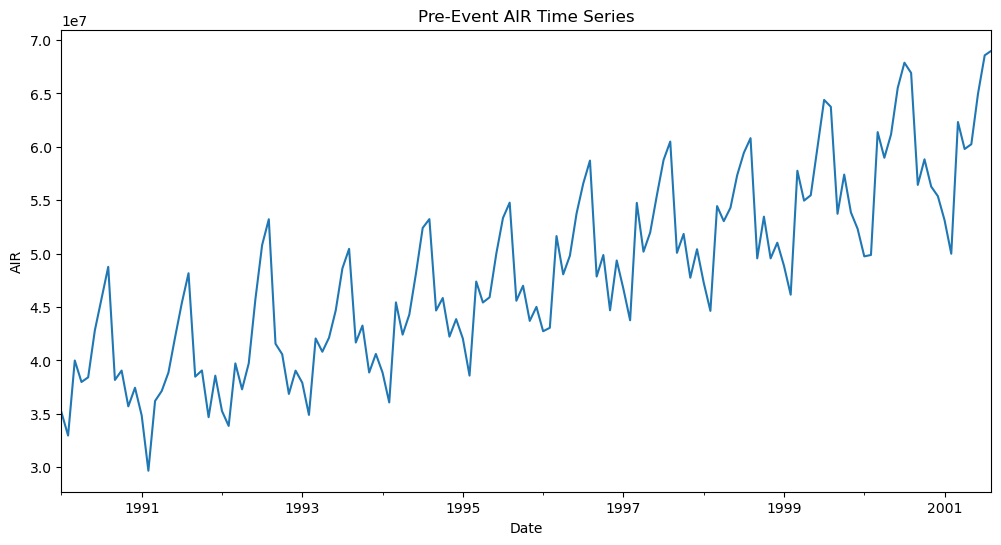

In [13]:
pre_event_air = data.loc[:'2001-08', 'Air_RPM']
pre_event_air.plot(figsize=(12, 6))
plt.xlabel('Date')
plt.ylabel('AIR')
plt.title('Pre-Event AIR Time Series')
plt.show()


##  <font color="blue"> 4.2  Seasonal Adjustment of Pre-September-11 AIR Series </font>
This code performs seasonal adjustment on the pre-September-11 AIR series data using the multiplicative model with a seasonal period of 12. The seasonally adjusted AIR series is then plotted against the date, showing the seasonally adjusted revenue passenger miles.

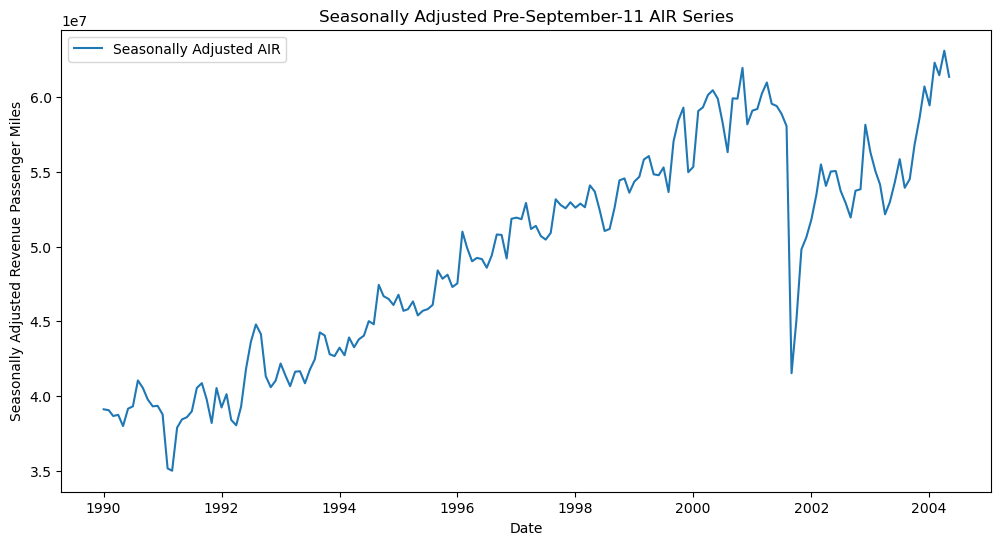

In [14]:
seasonal_decompose = sm.tsa.seasonal_decompose(data['Air_RPM'], model='multiplicative', period=12)
seasonally_adjusted_air = data['Air_RPM'] / seasonal_decompose.seasonal

# Plot the seasonally adjusted pre-September-11 AIR series
plt.figure(figsize=(12, 6))
plt.plot(data.index, seasonally_adjusted_air, label='Seasonally Adjusted AIR')
plt.xlabel('Date')
plt.ylabel('Seasonally Adjusted Revenue Passenger Miles')
plt.title('Seasonally Adjusted Pre-September-11 AIR Series')
plt.legend()
plt.show()


##  <font color="blue"> 4.3  Linear Regression Model for Seasonally Adjusted Air Data </font>
This code snippet defines and fits a linear regression model using the Ordinary Least Squares (OLS) method to analyze seasonally adjusted air data. The summary of the model is then printed, providing an overview of the regression results and statistical information.

In [15]:
# Define the linear regression model
model = sm.OLS(seasonally_adjusted_air, sm.add_constant(range(len(seasonally_adjusted_air))))

# Fit the model
results = model.fit()

# Print the summary of the model
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     732.3
Date:                Tue, 06 Jun 2023   Prob (F-statistic):           1.07e-63
Time:                        05:30:39   Log-Likelihood:                -2833.3
No. Observations:                 173   AIC:                             5671.
Df Residuals:                     171   BIC:                             5677.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.824e+07   4.78e+05     80.074      0.0

##  <font color="blue"> 4.4  Statistical Significance Analysis and Residual Calculation in Regression Model </font>
This code snippet performs statistical significance analysis on the coefficients for the months of October and September in a regression model. It prints the p-values for the October and September coefficients. Additionally, it calculates and prints the residual value for January 1990 using the regression model.

In [16]:
print("Statistical significance of coefficients for October and September:")
print(results.pvalues[1])  # p-value for October coefficient
print(results.pvalues[0])  # p-value for September coefficient

# Calculate the residual for January 1990 using the regression model
residual_jan_1990 = results.resid[0]
print("Residual for January 1990:", residual_jan_1990)


Statistical significance of coefficients for October and September:
1.0656071560196023e-63
1.7273036475104124e-137
Residual for January 1990: 866867.3196726292


##  <font color="blue"> 4.5  ACF Plot of Regression Residuals: Assessing Autocorrelation in Regression Model </font>

This code generates an Autocorrelation Function (ACF) plot to analyze the presence of autocorrelation in the residuals of a regression model. The plot helps in evaluating if there is any systematic relationship or pattern in the residuals that violates the assumption of independence.

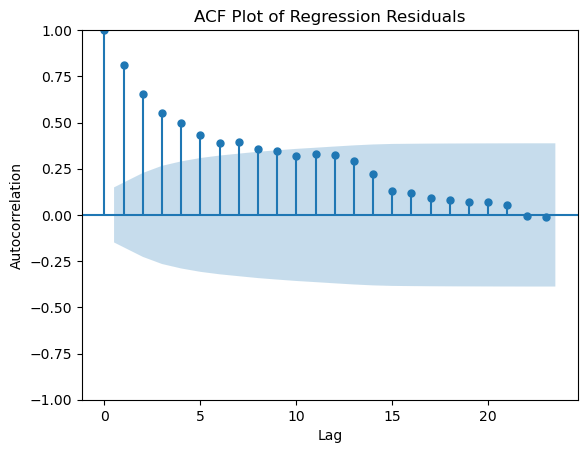

In [17]:
plot_acf(results.resid)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('ACF Plot of Regression Residuals')
plt.show()


##  <font color="blue"> 4.6  Forecasting Pre- and Post-Event Transportation Trends </font>
This code performs linear regression and generates forecasts for three transportation modes (Air, Rail, and Auto) before and after a specific event. It converts the datetime index to numeric values and fits linear regression models to the data. Then, it predicts future values using the fitted models and plots the actual and predicted data for each mode separately. The code helps analyze the impact of the event on the transportation trends and provides insights into post-event forecasts.

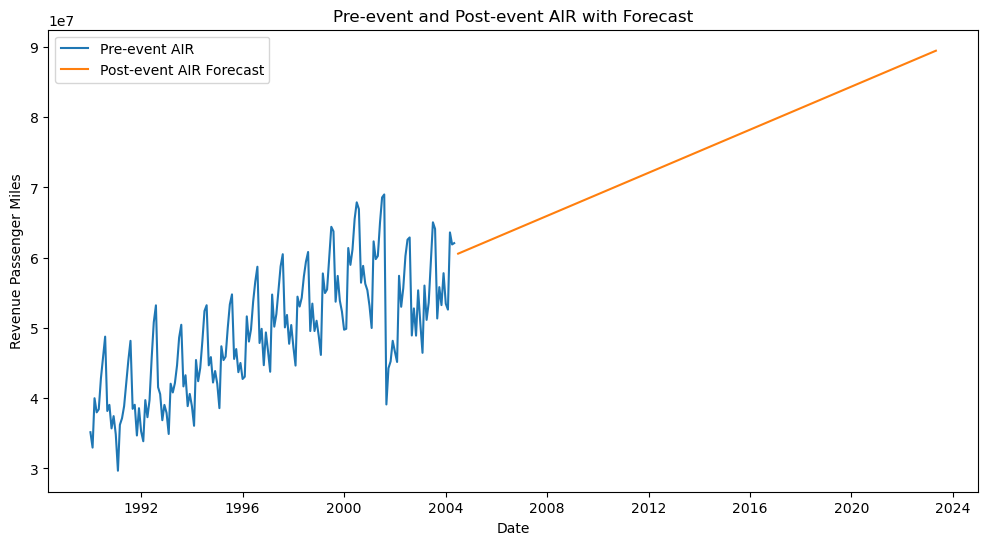

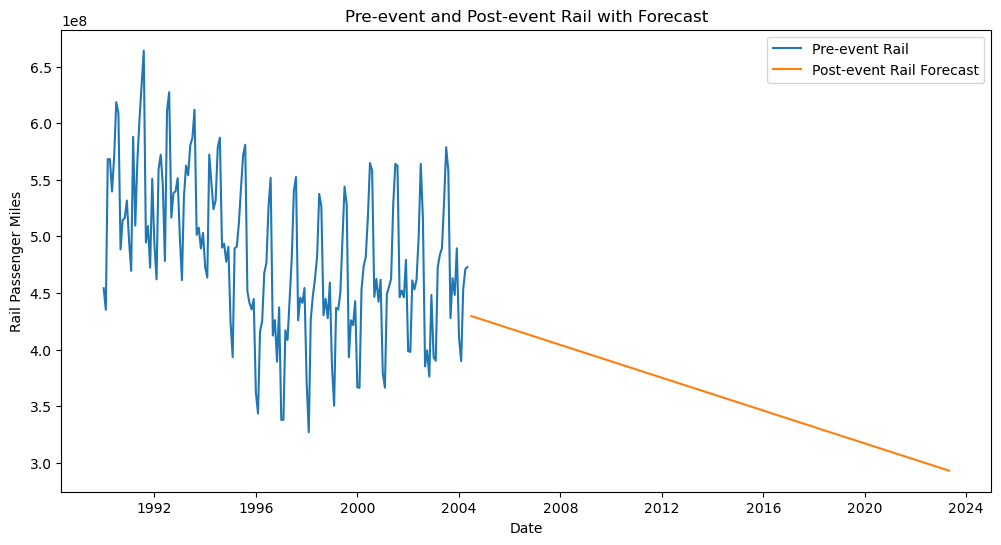

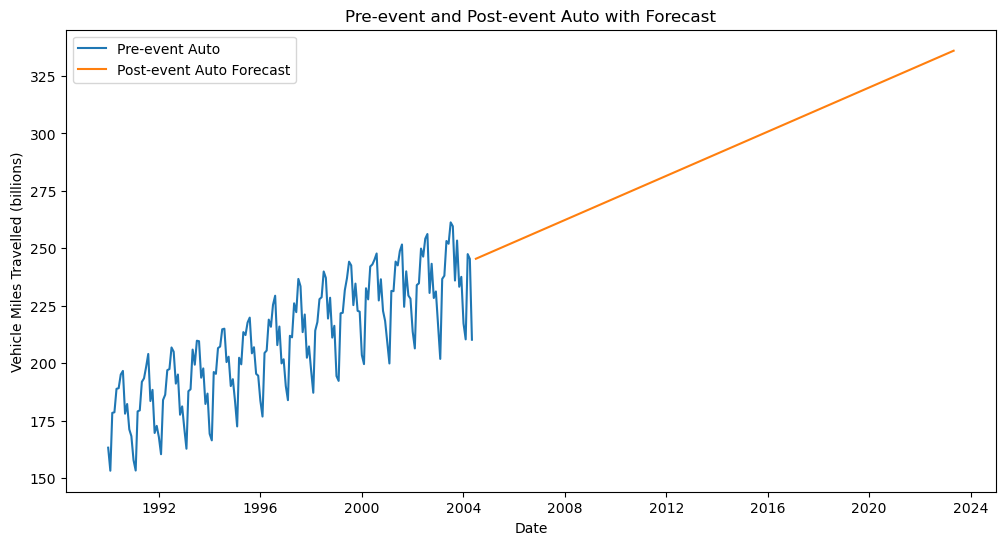

In [18]:
# Convert datetime index to numeric values
numeric_index = data.index.to_series().apply(lambda x: x.toordinal())

# Fit linear regression models to Air, Rail, and Auto data using additive seasonality and appropriate trends
results_air = sm.OLS(data['Air_RPM'], sm.add_constant(numeric_index)).fit()
results_rail = sm.OLS(data['Rail_PM'], sm.add_constant(numeric_index)).fit()
results_auto = sm.OLS(data['VMT_(billions)'], sm.add_constant(numeric_index)).fit()

# Generate forecasts for post-event series
post_event_dates = pd.date_range(start='2004-06-01', end='2023-05-01', freq='M')
post_event_numeric_index = pd.Series(post_event_dates).apply(lambda x: x.toordinal())

post_event_air_forecast = results_air.predict(sm.add_constant(post_event_numeric_index))
post_event_rail_forecast = results_rail.predict(sm.add_constant(post_event_numeric_index))
post_event_auto_forecast = results_auto.predict(sm.add_constant(post_event_numeric_index))

# Plot the complete pre-event and post-event actual series for Air, Rail, and Auto overlayed with the predicted series
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Air_RPM'], label='Pre-event AIR')
plt.plot(post_event_dates, post_event_air_forecast, label='Post-event AIR Forecast')
plt.xlabel('Date')
plt.ylabel('Revenue Passenger Miles')
plt.title('Pre-event and Post-event AIR with Forecast')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Rail_PM'], label='Pre-event Rail')
plt.plot(post_event_dates, post_event_rail_forecast, label='Post-event Rail Forecast')
plt.xlabel('Date')
plt.ylabel('Rail Passenger Miles')
plt.title('Pre-event and Post-event Rail with Forecast')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(data.index, data['VMT_(billions)'], label='Pre-event Auto')
plt.plot(post_event_dates, post_event_auto_forecast, label='Post-event Auto Forecast')
plt.xlabel('Date')
plt.ylabel('Vehicle Miles Travelled (billions)')
plt.title('Pre-event and Post-event Auto with Forecast')
plt.legend()
plt.show()
